<a href="https://colab.research.google.com/github/Sahil-Ishmam/AJAX/blob/main/Employee_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset and Libraries

First, let's import the necessary libraries and load the dataset.

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

>Upload the dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Employee Attrition.csv to Employee Attrition.csv


> Load the dataset

In [9]:
file_path = "/content/Employee Attrition.csv"
df = pd.read_csv(file_path)

> Display the first few rows


In [10]:
df.head()

Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80             0.86             5.0   
2     3.0                0.11             0.88             7.0   
3     4.0                0.72             0.87             5.0   
4     5.0                0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 157.0                 3.0            0.0   
1                 262.0                 6.0            0.0   
2                 272.0                 4.0            0.0   
3                 223.0                 5.0            0.0   
4                 159.0                 3.0            0.0   

   promotion_last_5years   dept  salary  
0                    0.0  sales     low  
1                    0.0  sales  medium  
2                    0.0  sales  medium  
3                    0.0  sales     low  
4                    0.0  sales     low

#Check Data Information

> basic info

In [11]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


>MIssing values

> Number of data in the dataset

In [15]:
# prompt: number of data in the dataset

print("Number of data in the dataset:", df.shape[0])


Number of data in the dataset: 15787


In [12]:
# missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64


>basic statistics

In [13]:
df.describe()

Emp ID  satisfaction_level  last_evaluation  number_project  \
count  14999.000000        14999.000000     14999.000000    14999.000000   
mean    7500.000000            0.612834         0.716102        3.803054   
std     4329.982679            0.248631         0.171169        1.232592   
min        1.000000            0.090000         0.360000        2.000000   
25%     3750.500000            0.440000         0.560000        3.000000   
50%     7500.000000            0.640000         0.720000        4.000000   
75%    11249.500000            0.820000         0.870000        5.000000   
max    14999.000000            1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.000000       0.000000   
75%              245.000000            4.000000       0.000000   
max              310.000000           10.000000       1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

# Exploratory Data Analysis (EDA).

**Univariate Analysis**

(a) Distribution of Employee Satisfaction Level

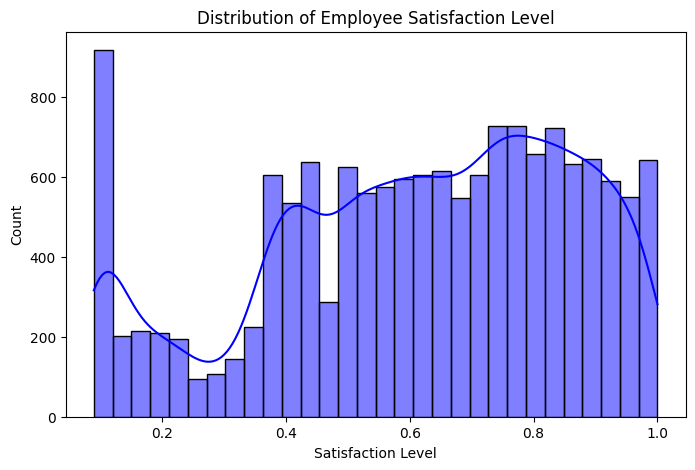

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df["satisfaction_level"], bins=30, kde=True, color="blue")
plt.title("Distribution of Employee Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()

> (b) Distribution of Last Evaluation

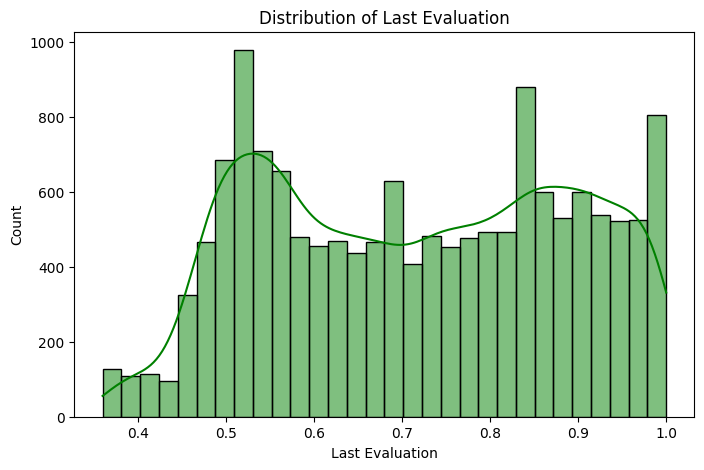

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["last_evaluation"], bins=30, kde=True, color="green")
plt.title("Distribution of Last Evaluation")
plt.xlabel("Last Evaluation")
plt.ylabel("Count")
plt.show()

>(c) Distribution of Number of Projects


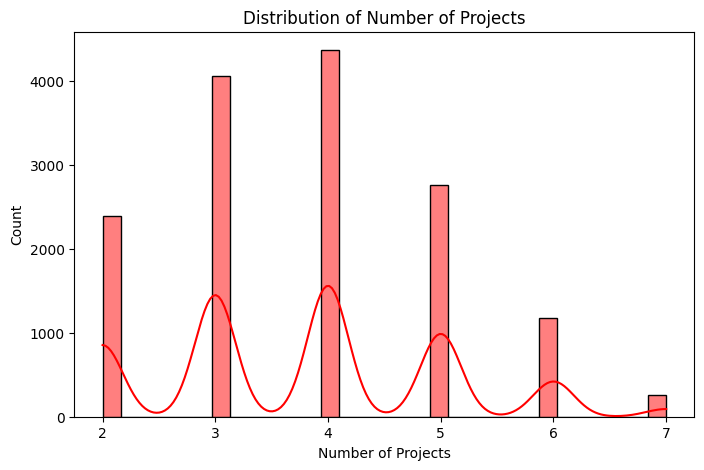

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df["number_project"], kde=True, color="red")
plt.title("Distribution of Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.show()

> (d) Distribution of Average Monthly Hours

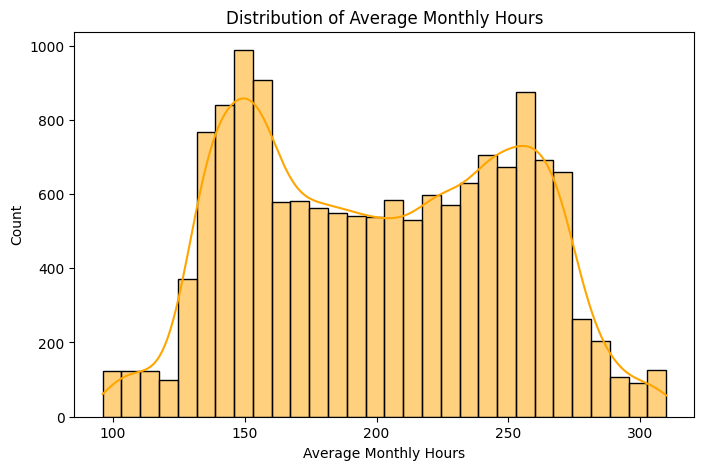

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["average_montly_hours"], bins=30, kde=True, color="orange")
plt.title("Distribution of Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Count")
plt.show()

>(e) Distribution of Time Spend in Company


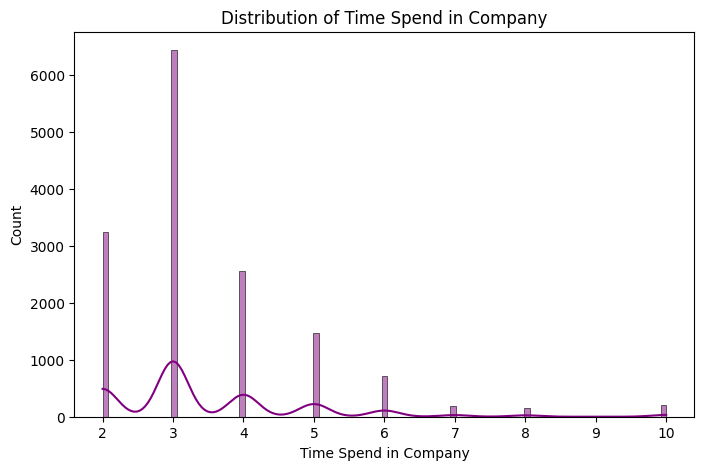

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df["time_spend_company"], kde=True, color="purple")
plt.title("Distribution of Time Spend in Company")
plt.xlabel("Time Spend in Company")
plt.ylabel("Count")
plt.show()

>(f) Distribution of Work Accident

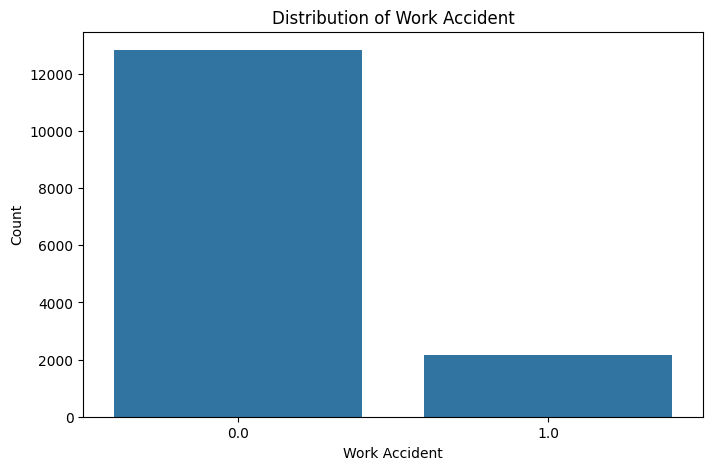

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Work_accident", data=df)
plt.title("Distribution of Work Accident")
plt.xlabel("Work Accident")
plt.ylabel("Count")
plt.show()


>(g) Distribution of Promotion Last 5 Years

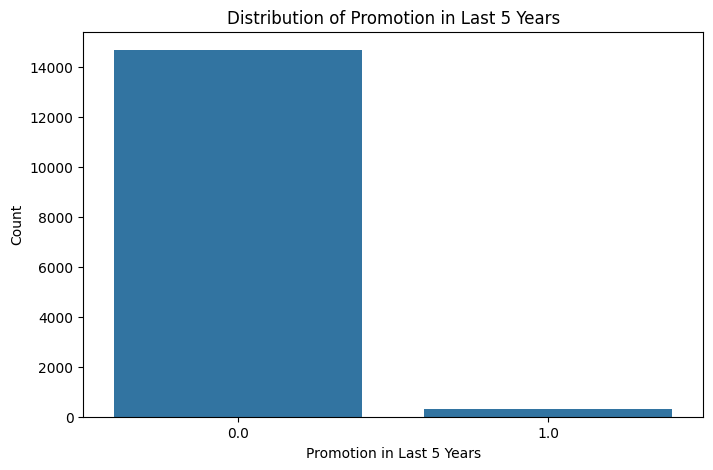

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x="promotion_last_5years", data=df)
plt.title("Distribution of Promotion in Last 5 Years")
plt.xlabel("Promotion in Last 5 Years")
plt.ylabel("Count")
plt.show()

>(h) Distribution of Department

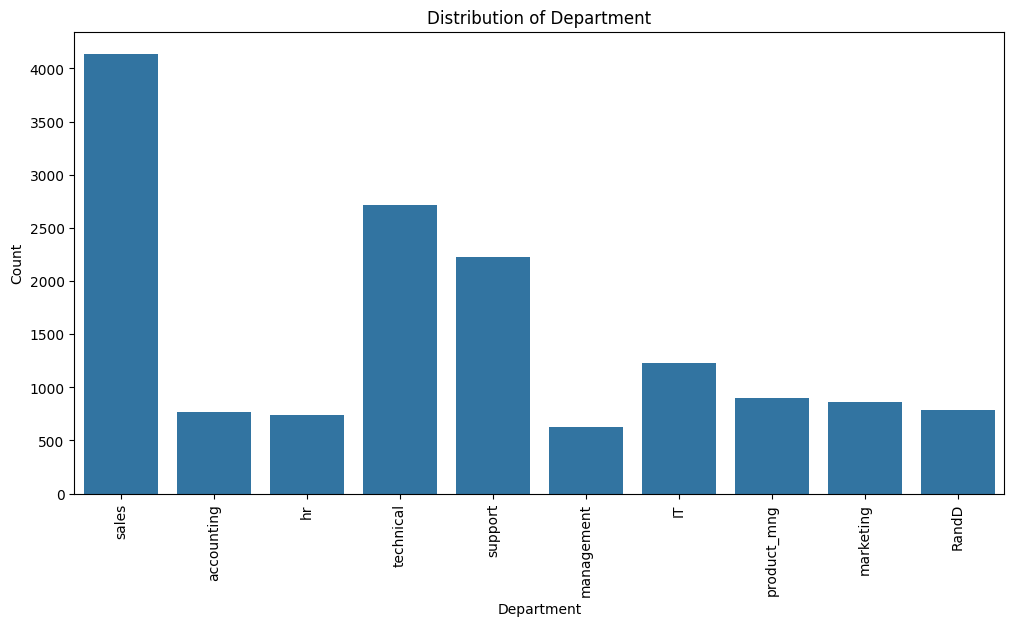

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x="dept", data=df)
plt.title("Distribution of Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


>(i) Distribution of Salary

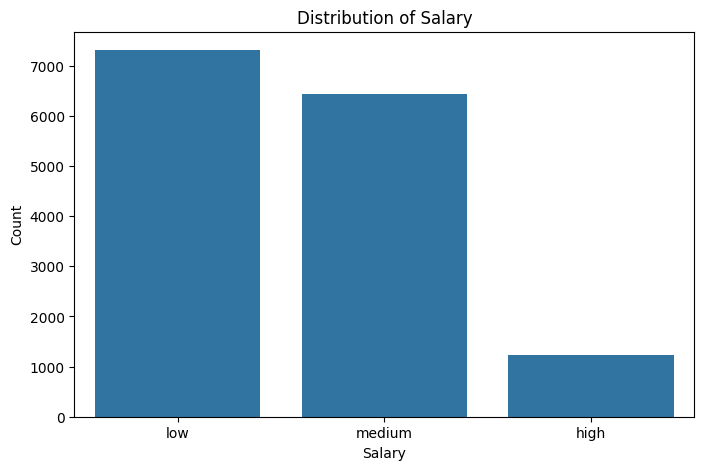

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x="salary", data=df)
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


>(j) Distribution of Left

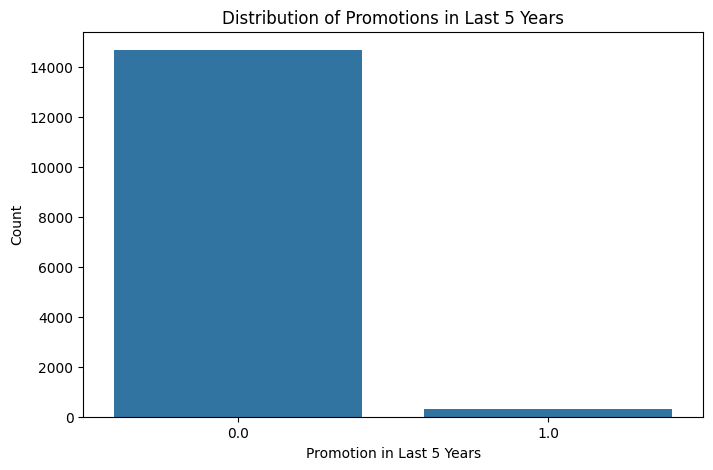

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x="promotion_last_5years", data=df)  # Example: Replace "left" with the correct column
plt.title("Distribution of Promotions in Last 5 Years")
plt.xlabel("Promotion in Last 5 Years")
plt.ylabel("Count")
plt.show()




>>Bivariate Analysis

>1. Satisfaction Level vs. Last Evaluation

all columns

In [42]:
print(df.columns)

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


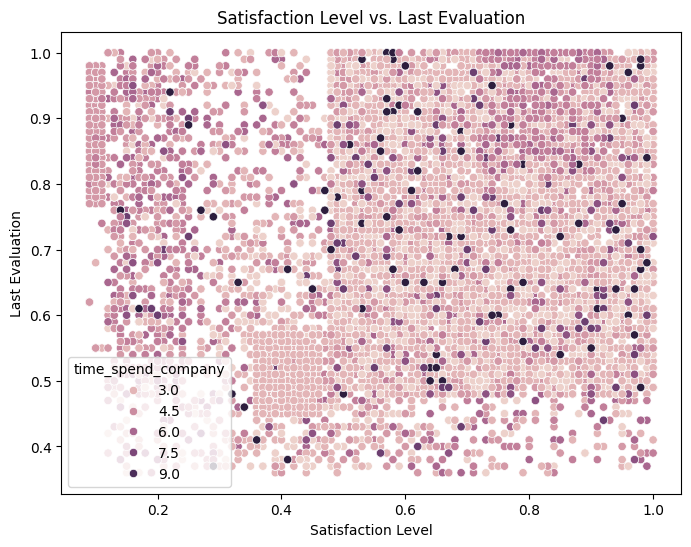

In [41]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', data=df, hue='time_spend_company')
plt.title('Satisfaction Level vs. Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

In [39]:
print(df.columns)


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


>2. Satisfaction Level vs. Average Monthly Hours

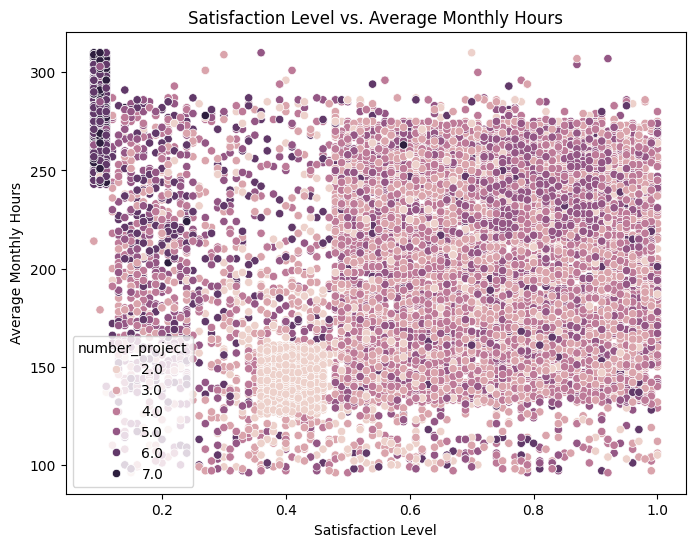

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', data=df, hue='number_project')
plt.title('Satisfaction Level vs. Average Monthly Hours')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.show()


>3. Number of Projects vs. Average Monthly Hours

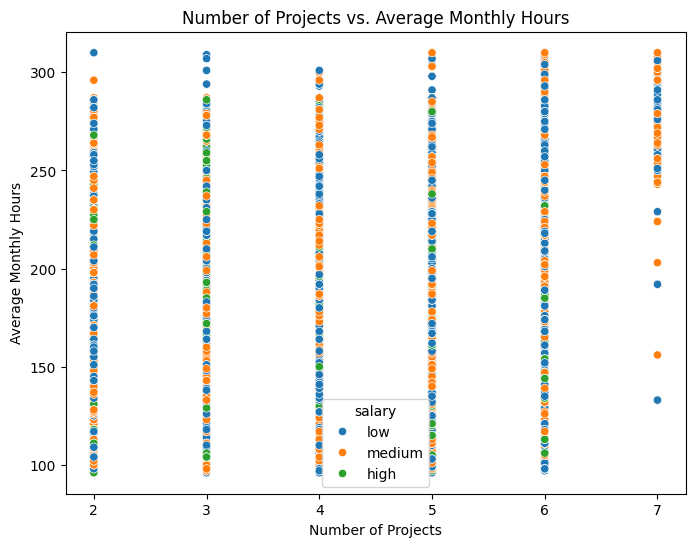

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_project', y='average_montly_hours', data=df, hue='salary')
plt.title('Number of Projects vs. Average Monthly Hours')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.show()

>4. Time Spend in Company vs. promotion last 5years

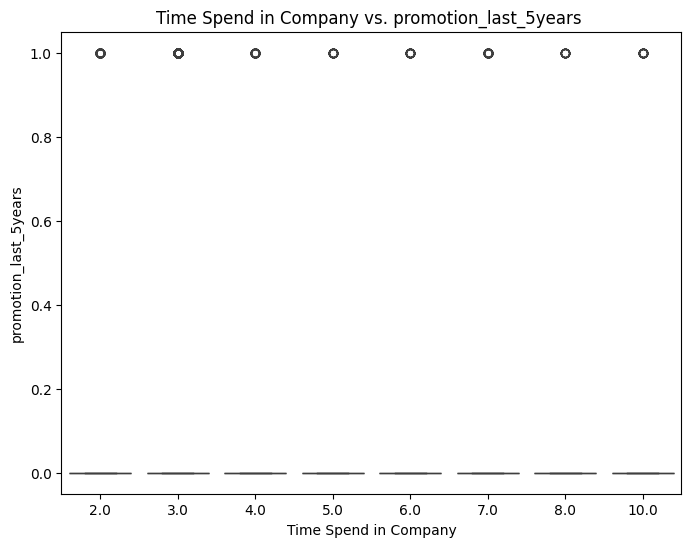

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_spend_company', y='promotion_last_5years', data=df)
plt.title('Time Spend in Company vs. promotion_last_5years ')
plt.xlabel('Time Spend in Company')
plt.ylabel('promotion_last_5years')
plt.show()

In [45]:
print(df.columns)


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


>5. Department vs. salary


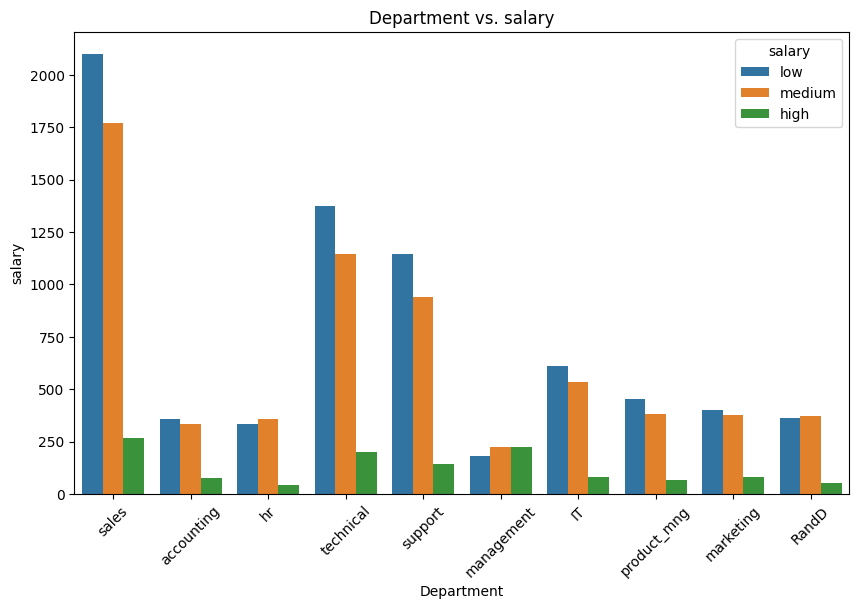

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='dept', hue='salary', data=df)
plt.title('Department vs. salary')
plt.xlabel('Department')
plt.ylabel('salary')
plt.xticks(rotation=45)
plt.show()

In [47]:
print(df.columns)


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


>6. Salary vs. satisfaction_level

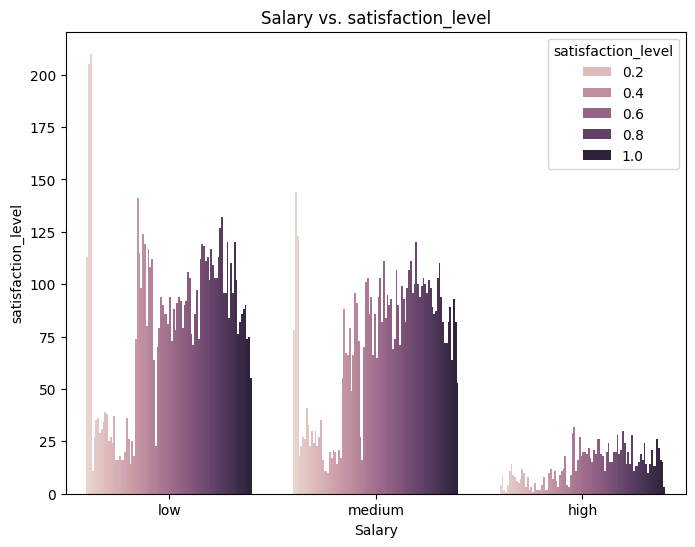

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='satisfaction_level', data=df)
plt.title('Salary vs. satisfaction_level')
plt.xlabel('Salary')
plt.ylabel('satisfaction_level')
plt.show()

 7. Work Accident vs. number_project

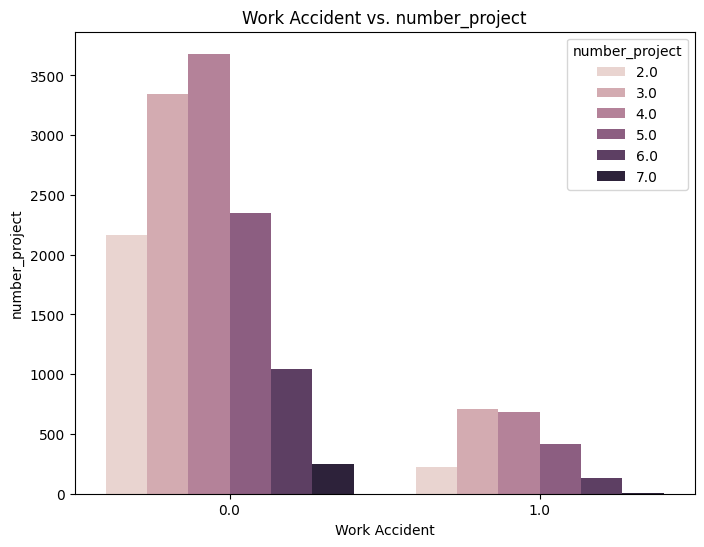

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Work_accident', hue='number_project', data=df)
plt.title('Work Accident vs. number_project')
plt.xlabel('Work Accident')
plt.ylabel('number_project')
plt.show()

> 8. Promotion Last 5 Years vs. Left

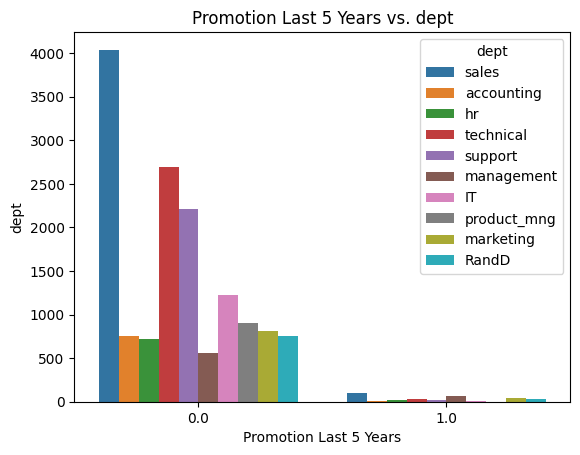

In [51]:
sns.countplot(x='promotion_last_5years', hue='dept', data=df)
plt.title('Promotion Last 5 Years vs. dept')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('dept')
plt.show()


>9 Bar Chart for Categorical Features (Department and Salary)

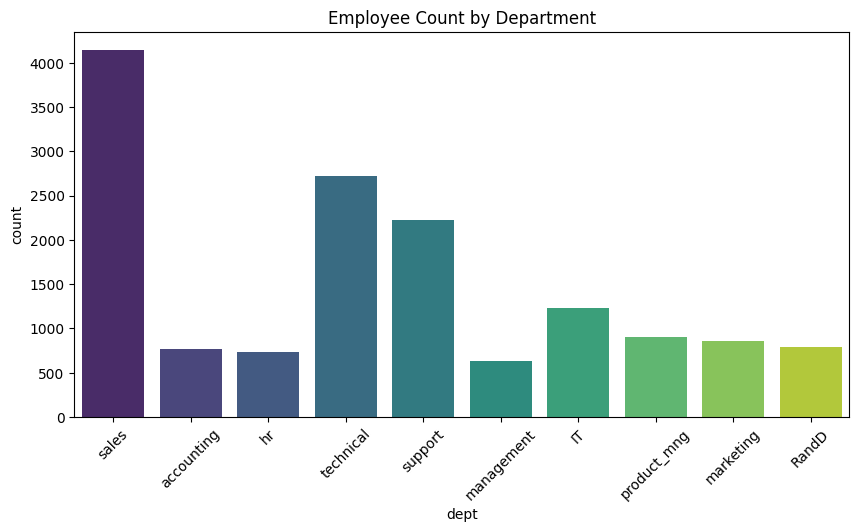

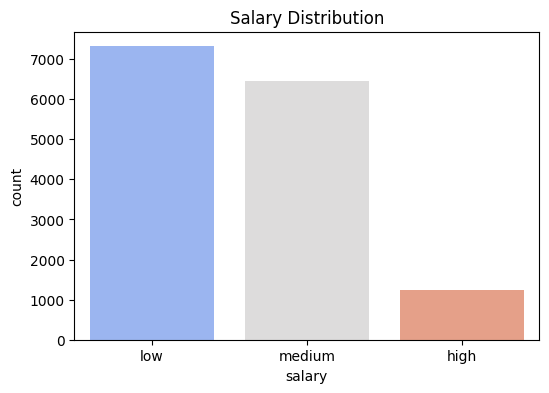

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(x="dept", data=df, palette="viridis")
plt.title("Employee Count by Department")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="salary", data=df, palette="coolwarm")
plt.title("Salary Distribution")
plt.show()


>10. Pie Chart for Promotions in Last 5 Years

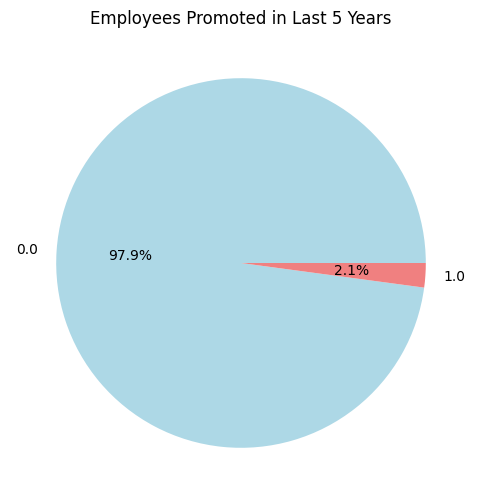

In [53]:
plt.figure(figsize=(6, 6))
df["promotion_last_5years"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral"])
plt.title("Employees Promoted in Last 5 Years")
plt.ylabel("")  # Hide y-label
plt.show()


>11. Bar Chart - Average Monthly Hours by Salary

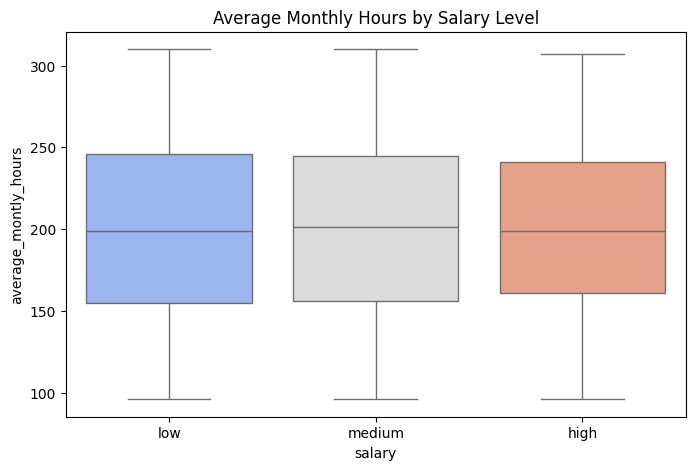

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="salary", y="average_montly_hours", data=df, palette="coolwarm")
plt.title("Average Monthly Hours by Salary Level")
plt.show()

> 12. Promotion vs. Work Accident Analysis

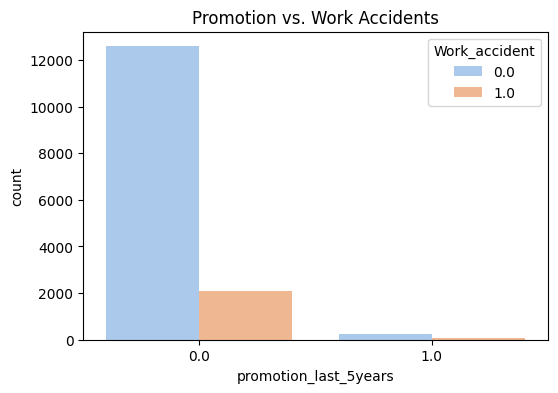

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(x="promotion_last_5years", hue="Work_accident", data=df, palette="pastel")
plt.title("Promotion vs. Work Accidents")
plt.show()


>>Multivariate Analysis

1. Correlation Matrix and Heatmap

In [56]:

df_encoded = pd.get_dummies(df, columns=["dept", "salary"], drop_first=True)

df_encoded.head()


Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80             0.86             5.0   
2     3.0                0.11             0.88             7.0   
3     4.0                0.72             0.87             5.0   
4     5.0                0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 157.0                 3.0            0.0   
1                 262.0                 6.0            0.0   
2                 272.0                 4.0            0.0   
3                 223.0                 5.0            0.0   
4                 159.0                 3.0            0.0   

   promotion_last_5years  dept_RandD  dept_accounting  dept_hr  \
0                    0.0       False            False    False   
1                    0.0       False            False    False   
2                    0.0       False            False    False   
3                    0.0       False            False    False   
4                    0.0       False            False    False   

   dept_management  dept_marketing  dept_product_mng  dept_sales  \
0            False           False             False        True   
1            False           False             False        True   
2            False           False             False        True   
3            False           False             False        True   
4            False           False             False        True   

   dept_support  dept_technical  salary_low  salary_medium  
0         False           False        True          False  
1         False           False       False           True  
2         False           False       False           True  
3         False           False        True          False  
4         False           False        True          False

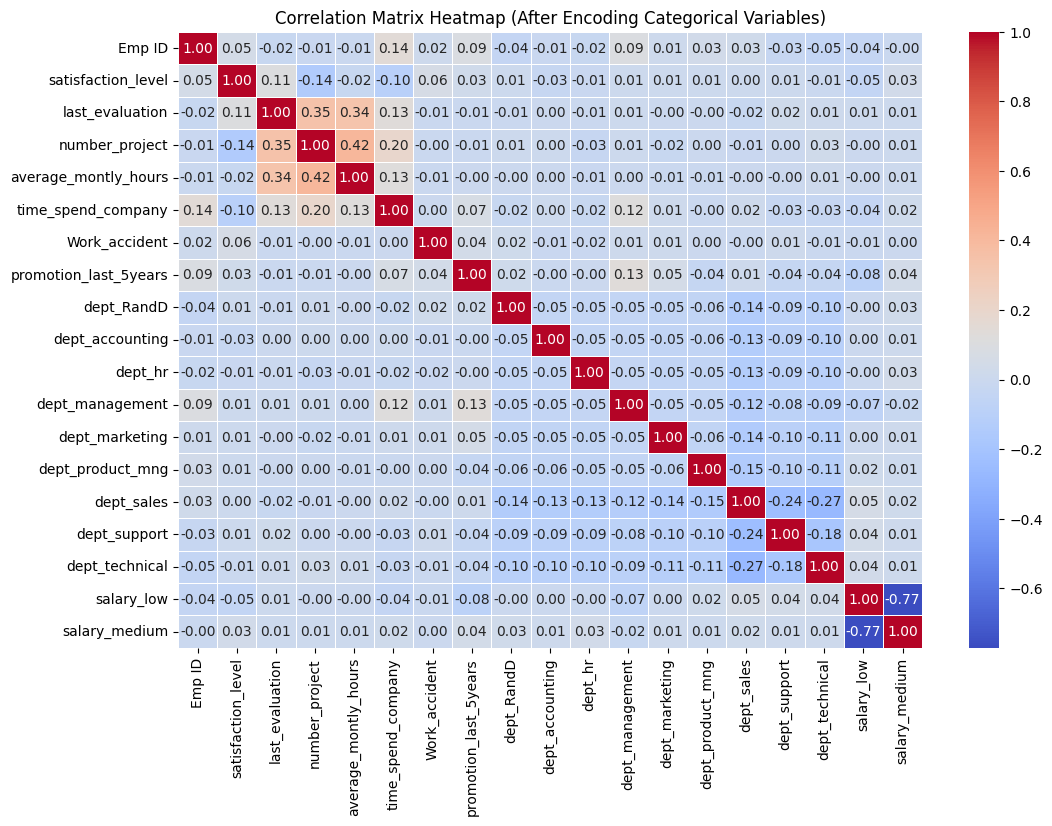

In [57]:
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After Encoding Categorical Variables)")
plt.show()


In [58]:
print(df.columns)

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


>Overall Relationship between Features

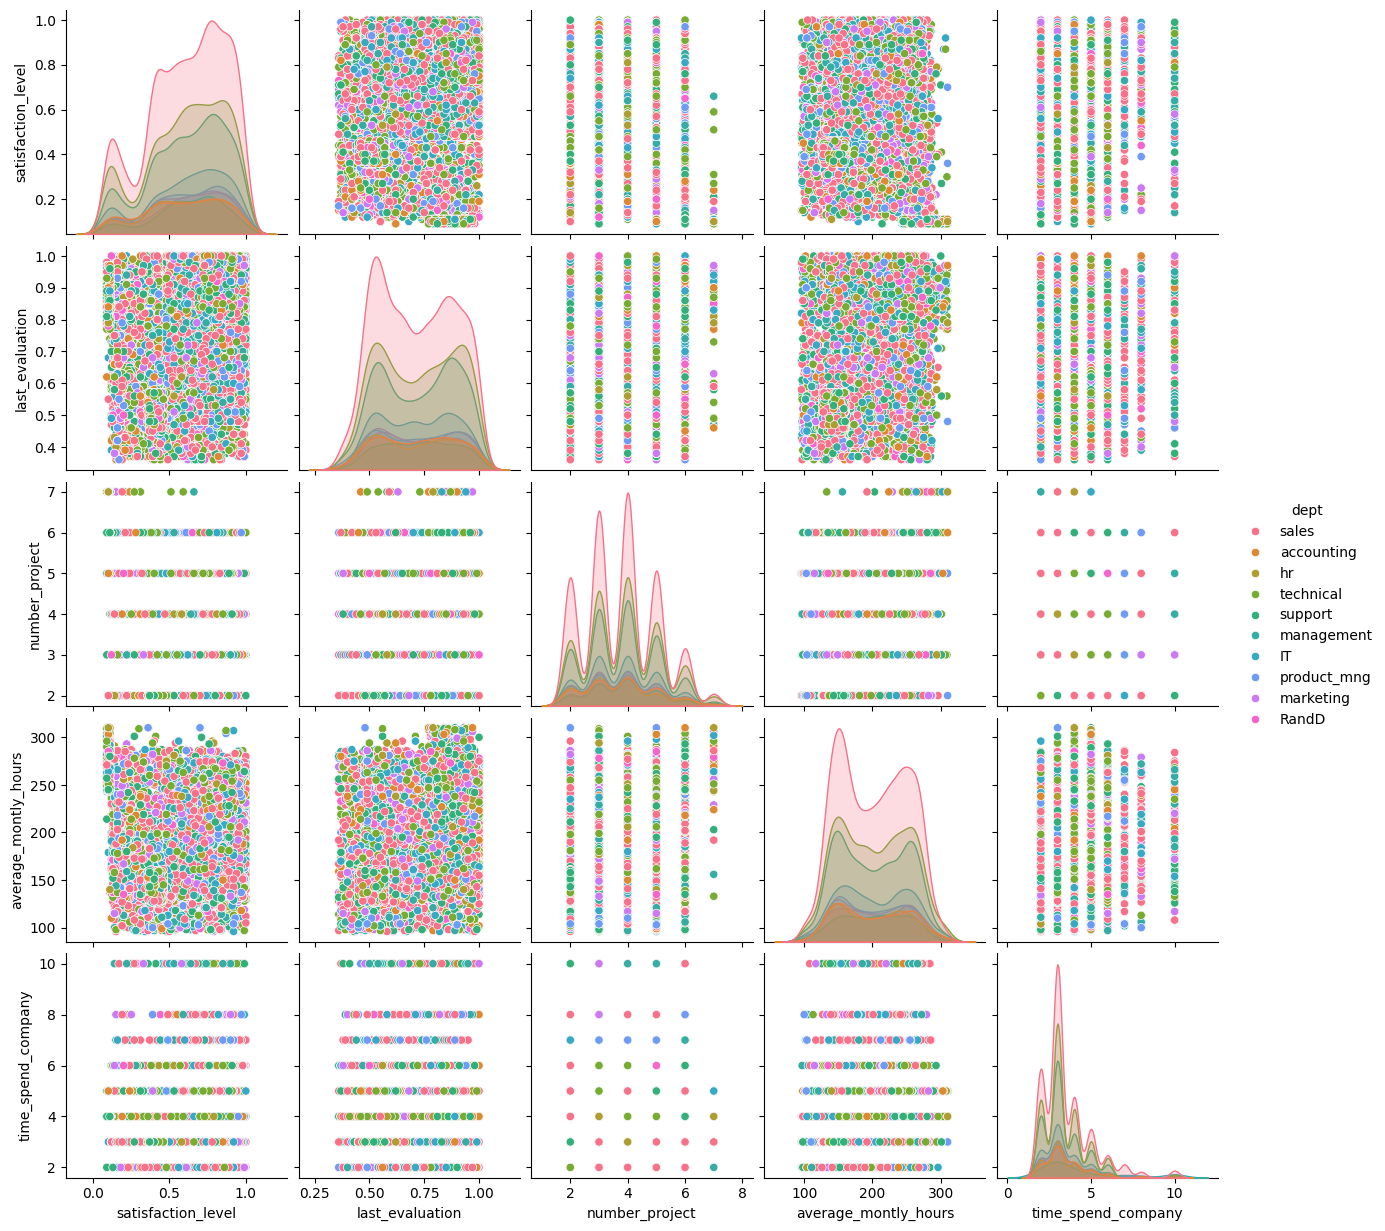

In [60]:
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                  'average_montly_hours', 'time_spend_company']

sns.pairplot(df, vars=numerical_cols, hue="dept", palette="husl")
plt.show()

>Boxplot (Salary & Job Satisfaction by Department)

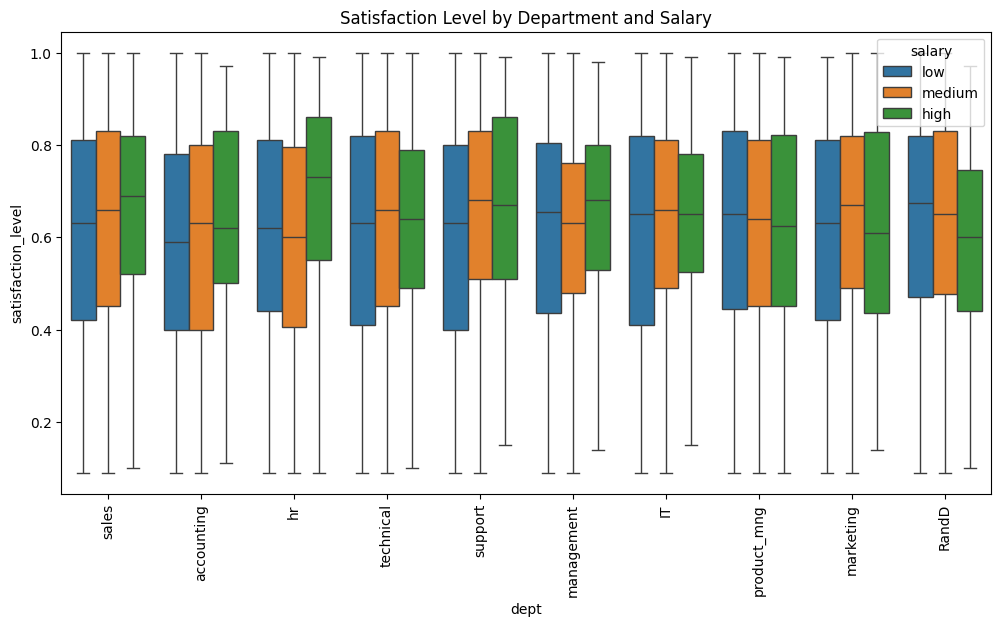

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="dept", y="satisfaction_level", hue="salary", data=df)
plt.xticks(rotation=90)
plt.title("Satisfaction Level by Department and Salary")
plt.show()

> Satisfaction, Evaluation & Work Hours

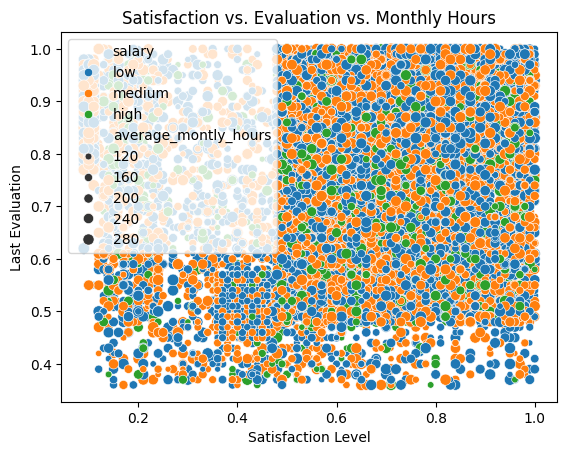

In [62]:
sns.scatterplot(x="satisfaction_level", y="last_evaluation", size="average_montly_hours", hue="salary", data=df)
plt.title("Satisfaction vs. Evaluation vs. Monthly Hours")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.show()


# Task 2. Data Preprocessing

> Check for Null Values

In [64]:

print("Missing values before handling:\n", df.isnull().sum())


Missing values before handling:
 Emp ID                     0
satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company         0
Work_accident              0
promotion_last_5years      0
dept                     788
salary                   788
dtype: int64


>Fill missing values (if any) - Using median for numerical columns

In [65]:

df.fillna(df.median(numeric_only=True), inplace=True)

>Check again for missing values

In [66]:
print("\nMissing values after handling:\n", df.isnull().sum())



Missing values after handling:
 Emp ID                     0
satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company         0
Work_accident              0
promotion_last_5years      0
dept                     788
salary                   788
dtype: int64


>Check for Skewness

In [67]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].skew()


Emp ID                   0.000000
satisfaction_level      -0.504987
last_evaluation         -0.030809
number_project           0.321485
average_montly_hours     0.057441
time_spend_company       1.935071
Work_accident            2.106795
promotion_last_5years    6.820447
dtype: float64

> Identify Outliers using Boxplots

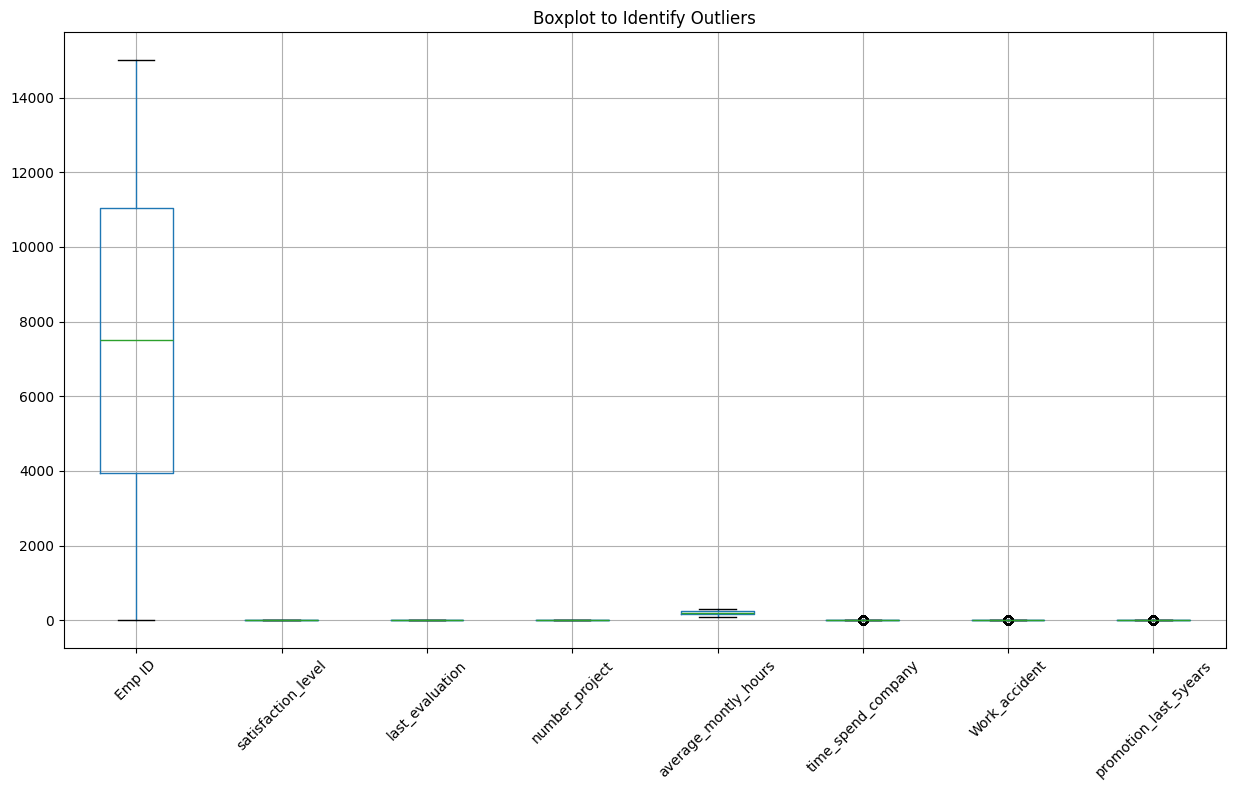

In [68]:
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.title("Boxplot to Identify Outliers")
plt.xticks(rotation=45)
plt.show()


> Handle Outliers (Using IQR Method)

In [69]:
# Using IQR (Interquartile Range) to remove outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
print("Dataset size after removing outliers:", df.shape)


Dataset size after removing outliers: (12380, 10)


> Scale Data (Min-Max Scaling)**

In [70]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_scaled.head()


Emp ID  satisfaction_level  last_evaluation  number_project  \
0  0.000000            0.318681         0.265625             0.0   
2  0.000133            0.021978         0.812500             1.0   
3  0.000200            0.692308         0.796875             0.6   
4  0.000267            0.307692         0.250000             0.0   
5  0.000333            0.351648         0.218750             0.0   

   average_montly_hours  time_spend_company  Work_accident  \
0              0.285047            0.333333            0.0   
2              0.822430            0.666667            0.0   
3              0.593458            1.000000            0.0   
4              0.294393            0.333333            0.0   
5              0.266355            0.333333            0.0   

   promotion_last_5years   dept  salary  
0                    0.0  sales     low  
2                    0.0  sales  medium  
3                    0.0  sales     low  
4                    0.0  sales     low  
5                    0.0  sales     low

> Check Class Imbalance in Categorical Data

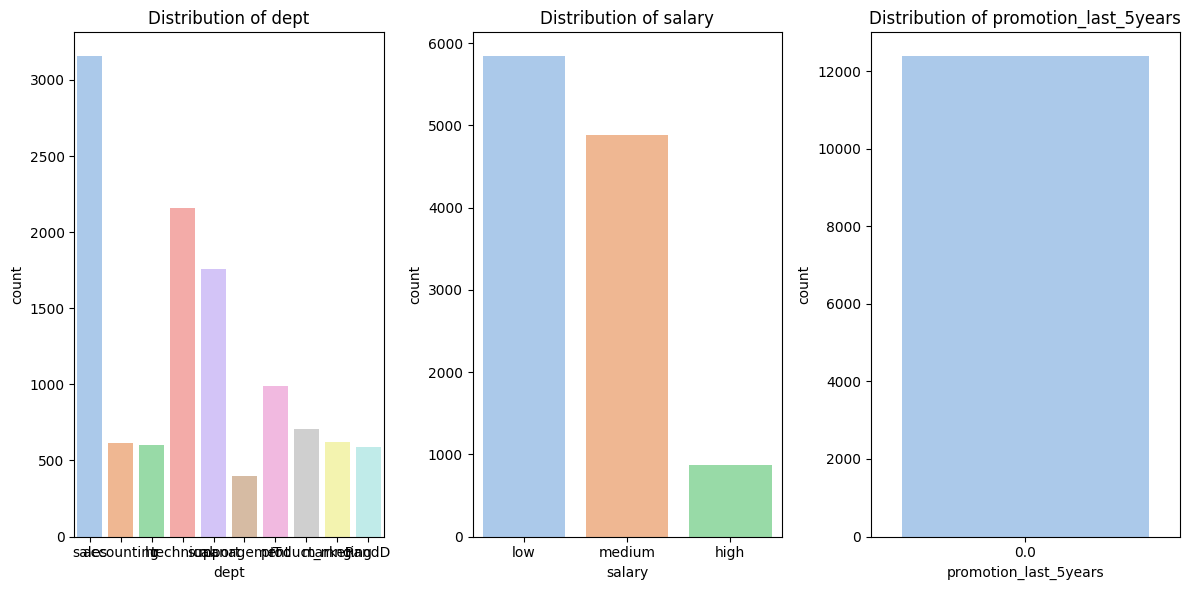

In [71]:
categorical_cols = ["dept", "salary", "promotion_last_5years"]
plt.figure(figsize=(12, 6))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


**There is no need for smote**




>Split Dataset into Train and Test Set

In [74]:
# Encode categorical variables (dept and salary)
X = pd.get_dummies(df.drop(columns=["satisfaction_level"]), columns=["dept", "salary"], drop_first=True)

# Define target variable
y = df["satisfaction_level"]  # Since we are keeping regression

# Split the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (9904, 18)
Testing set size: (2476, 18)


# Task 3. Fit to ML model

**Train Three Machine Learning Models**

In [75]:
# Initializ
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)


**Evaluate Model Performance**

In [76]:

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"\tMAE: {mae:.4f},\n\tRMSE: {rmse:.4f},\n\tR²: {r2:.4f}\n")


evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")


Linear Regression Performance:
	MAE: 0.1917,
	RMSE: 0.2331,
	R²: 0.1002

Random Forest Performance:
	MAE: 0.1134,
	RMSE: 0.1612,
	R²: 0.5696

Gradient Boosting Performance:
	MAE: 0.1221,
	RMSE: 0.1691,
	R²: 0.5266



**Develop an Ensemble Model (Voting Regressor)**

In [78]:
ensemble_model = VotingRegressor(estimators=[('rf', rf), ('gbr', gbr)])

ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)
evaluate_model(y_test, y_pred_ensemble, "Ensemble Model")


Ensemble Model Performance:
	MAE: 0.1162,
	RMSE: 0.1621,
	R²: 0.5649



**Develop an Artificial Neural Network (ANN/MLP)**

In [79]:
ann = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

ann.fit(X_train, y_train)

y_pred_ann = ann.predict(X_test)
evaluate_model(y_test, y_pred_ann, "Neural Network (ANN)")


Neural Network (ANN) Performance:
	MAE: 0.2191,
	RMSE: 0.2801,
	R²: -0.2992



# Task 4: Model Evaluation

In [80]:

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

model_results = []

Evaluate now

In [81]:
# Evaluate Linear Regression
model_results.append(evaluate_model(y_test, y_pred_lr, "Linear Regression"))

# Evaluate Random Forest
model_results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))

# Evaluate Gradient Boosting
model_results.append(evaluate_model(y_test, y_pred_gbr, "Gradient Boosting"))

# Evaluate Ensemble Model
model_results.append(evaluate_model(y_test, y_pred_ensemble, "Ensemble Model"))

# Evaluate Neural Network (ANN)
model_results.append(evaluate_model(y_test, y_pred_ann, "Neural Network (ANN)"))


**Display Performance Comparison Table**

In [82]:
# Convert results into a DataFrame
results_df = pd.DataFrame(model_results)

# Display sorted by RMSE (lower is better)
results_df.sort_values(by="RMSE", ascending=True)


Model       MAE       MSE      RMSE  R² Score
1         Random Forest  0.113356  0.025991  0.161216  0.569628
3        Ensemble Model  0.116227  0.026275  0.162095  0.564924
2     Gradient Boosting  0.122062  0.028588  0.169079  0.526626
0     Linear Regression  0.191705  0.054338  0.233104  0.100238
4  Neural Network (ANN)  0.219131  0.078460  0.280106 -0.299192

*Random Forest is the best for the dataset*

**Hyperparameter Tuning for Random Forest Regressor**

In [ ]:



param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Apply GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best model with optimized hyperparameters
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters
print("Best Random Forest Hyperparameters:", grid_search_rf.best_params_)

# Predict using the best model on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

# Evaluate the Random Forest model
rf_results = evaluate_model(y_test, y_pred_rf, "Tuned Random Forest")

# Display the results
print(rf_results)


Best Random Forest Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
{'Model': 'Tuned Random Forest', 'MAE': 0.11333435141796236, 'MSE': 0.02557783979217338, 'RMSE': np.float64(0.15993073435763802), 'R² Score': 0.5764632177497161}
